2024-12-13 16:05:39.644442: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 16:05:39.648498: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 16:05:39.689611: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 16:05:39.721077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734080739.756444  594087 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734080739.76

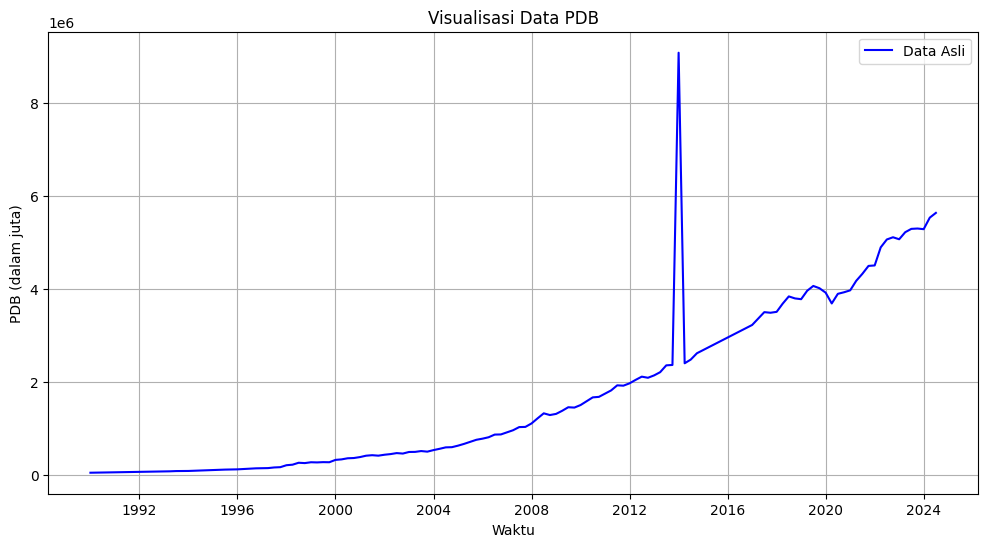

Epoch 1/50


2024-12-13 16:05:41.811776: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0310
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0226
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064     
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

/tmp/ipykernel_594087/3839682885.py:87: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')


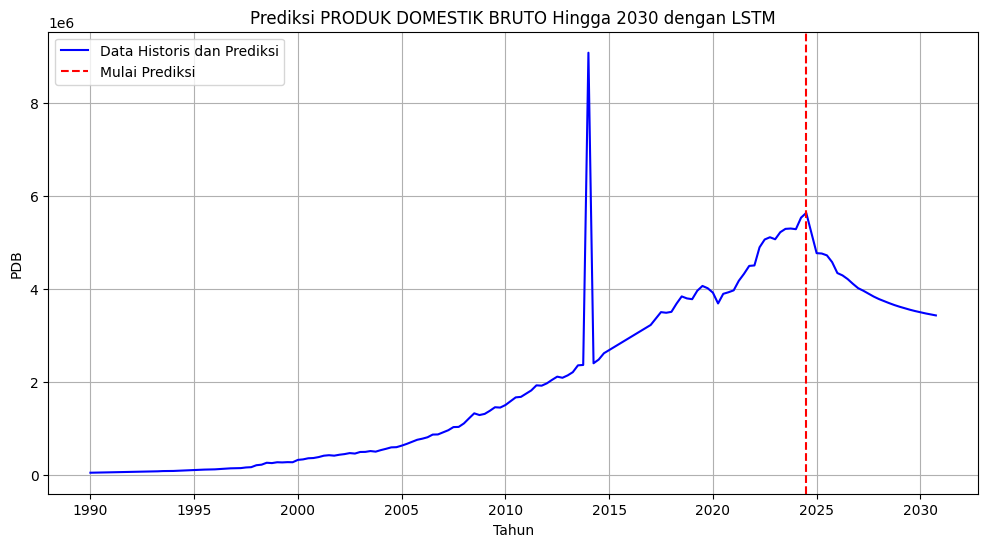

            PRODUK DOMESTIK BRUTO
2024-12-31             4772481.50
2025-03-31             4765182.50
2025-06-30             4725028.50
2025-09-30             4579186.50
2025-12-31             4344846.00
2026-03-31             4294623.00
2026-06-30             4215315.00
2026-09-30             4113795.00
2026-12-31             4019937.25
2027-03-31             3965608.50
2027-06-30             3902536.00
2027-09-30             3839875.50
2027-12-31             3786201.50
2028-03-31             3742085.00
2028-06-30             3697574.75
2028-09-30             3656448.50
2028-12-31             3620069.00
2029-03-31             3587133.75
2029-06-30             3555797.00
2029-09-30             3527117.50
2029-12-31             3501014.50
2030-03-31             3476871.75
2030-06-30             3454349.00
2030-09-30             3433623.75


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')

# Convert Quarter column to datetime and set as index
df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')
df = df.set_index('Quarter')

# Handle missing values using linear interpolation
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')

# Visualize original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='Data Asli', color='blue')
plt.title('Visualisasi Data PDB')
plt.xlabel('Waktu')
plt.ylabel('PDB (dalam juta)')
plt.legend()
plt.grid()
plt.show()

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['PRODUK DOMESTIK BRUTO'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 4  # Quarterly data
X, y = create_dataset(data_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict historical values
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reverse scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Forecast future values
n_future_steps = (2030 - df.index[-1].year) * 4
future_input = data_scaled[-time_step:]
future_forecast = []

for _ in range(n_future_steps):
    prediction = model.predict(future_input.reshape(1, time_step, 1), verbose=0)
    future_forecast.append(prediction[0, 0])
    future_input = np.append(future_input[1:], prediction, axis=0)

# Reverse scaling for forecast
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Create DataFrame for forecast
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')
forecast_df = pd.DataFrame({'PRODUK DOMESTIK BRUTO': future_forecast.flatten()}, index=future_dates)

# Combine historical data and forecast
result = pd.concat([df[['PRODUK DOMESTIK BRUTO']], forecast_df])

# Visualize historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['PRODUK DOMESTIK BRUTO'], label='Data Historis dan Prediksi', color='blue')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Mulai Prediksi')
plt.title('Prediksi PRODUK DOMESTIK BRUTO Hingga 2030 dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print(forecast_df)


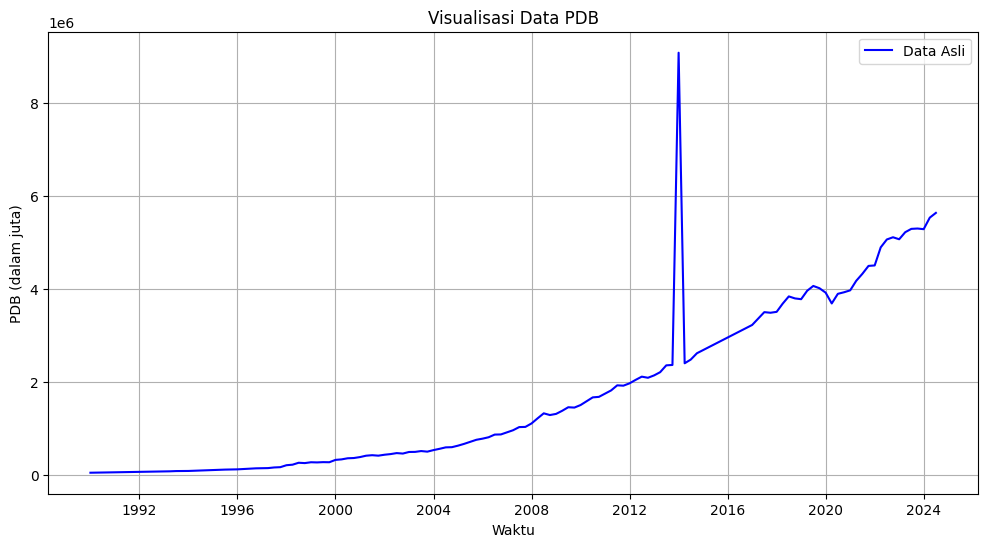

ADF Statistic: 1.1591752135224198
p-value: 0.9956913214458238
Data tidak stasioner.
ADF Statistic: -8.42878439009655
p-value: 1.8948711410931e-13
Data sudah stasioner.


<Figure size 1200x600 with 0 Axes>

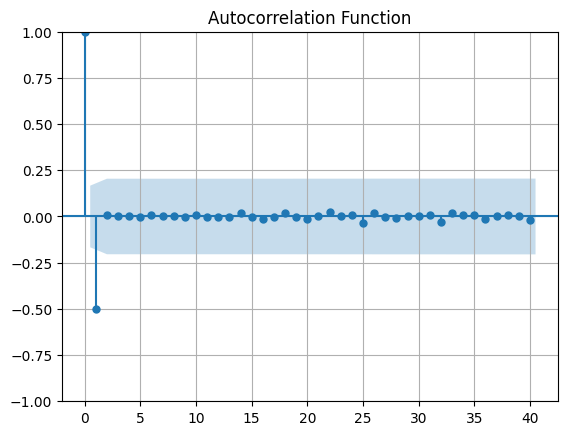

<Figure size 1200x600 with 0 Axes>

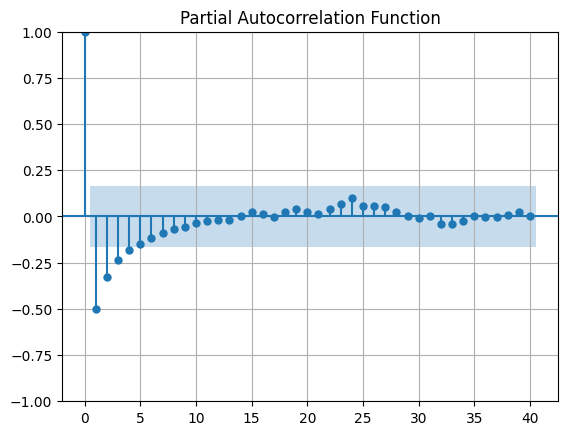

/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_594087/2296109426.py:67: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')


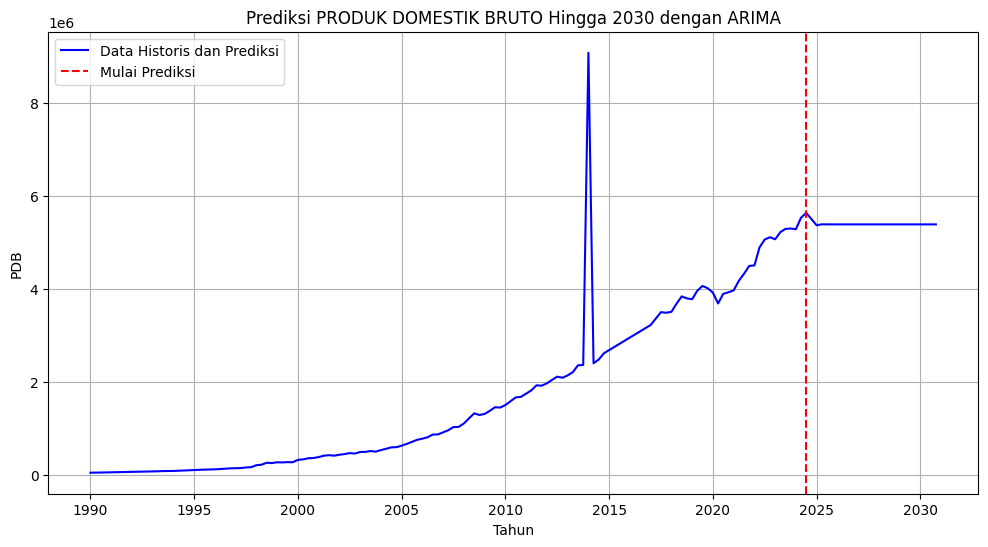

            PRODUK DOMESTIK BRUTO
2024-12-31           5.371902e+06
2025-03-31           5.393103e+06
2025-06-30           5.391420e+06
2025-09-30           5.391553e+06
2025-12-31           5.391543e+06
2026-03-31           5.391544e+06
2026-06-30           5.391544e+06
2026-09-30           5.391544e+06
2026-12-31           5.391544e+06
2027-03-31           5.391544e+06
2027-06-30           5.391544e+06
2027-09-30           5.391544e+06
2027-12-31           5.391544e+06
2028-03-31           5.391544e+06
2028-06-30           5.391544e+06
2028-09-30           5.391544e+06
2028-12-31           5.391544e+06
2029-03-31           5.391544e+06
2029-06-30           5.391544e+06
2029-09-30           5.391544e+06
2029-12-31           5.391544e+06
2030-03-31           5.391544e+06
2030-06-30           5.391544e+06
2030-09-30           5.391544e+06


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')

# Convert Quarter column to datetime and set as index
df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')
df = df.set_index('Quarter')

# Handle missing values using linear interpolation
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')

# Visualize original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='Data Asli', color='blue')
plt.title('Visualisasi Data PDB')
plt.xlabel('Waktu')
plt.ylabel('PDB (dalam juta)')
plt.legend()
plt.grid()
plt.show()

# Check stationarity with ADF test
def check_stationarity(data):
    data = data.dropna()
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("Data tidak stasioner.")
    else:
        print("Data sudah stasioner.")

check_stationarity(df['PRODUK DOMESTIK BRUTO'])

# Differencing to achieve stationarity
df['PDB_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff()
check_stationarity(df['PDB_DIFF'])

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Autocorrelation Function')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.show()

# Fit ARIMA model
model = ARIMA(df['PRODUK DOMESTIK BRUTO'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future values
n_future_steps = (2030 - df.index[-1].year) * 4
forecast = model_fit.forecast(steps=n_future_steps)

# Create DataFrame for forecast
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')
forecast_df = pd.DataFrame({'PRODUK DOMESTIK BRUTO': forecast.values}, index=future_dates)

# Combine historical data and forecast
result = pd.concat([df[['PRODUK DOMESTIK BRUTO']], forecast_df])

# Visualize historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['PRODUK DOMESTIK BRUTO'], label='Data Historis dan Prediksi', color='blue')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Mulai Prediksi')
plt.title('Prediksi PRODUK DOMESTIK BRUTO Hingga 2030 dengan ARIMA')
plt.xlabel('Tahun')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print(forecast_df)


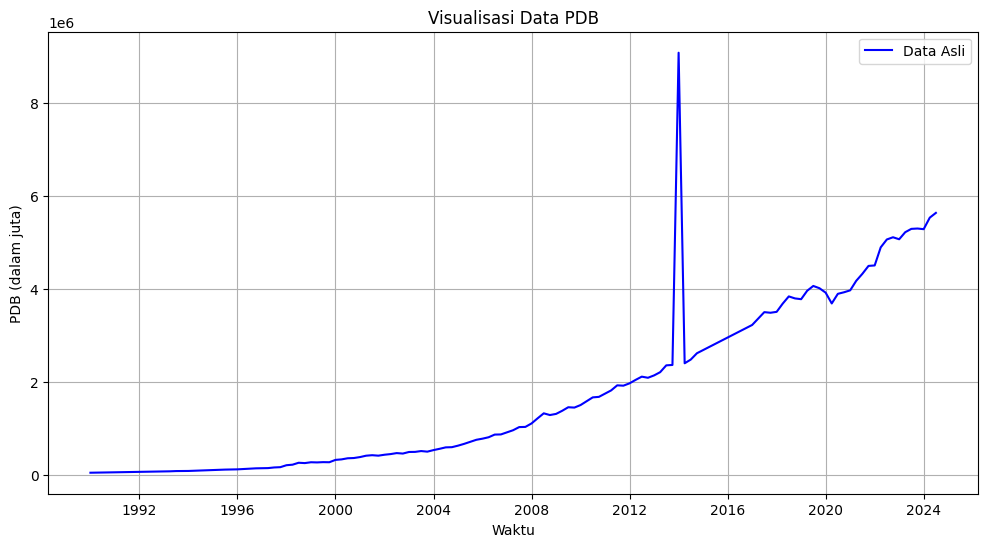

ADF Statistic: 1.1591752135224198
p-value: 0.9956913214458238
Data tidak stasioner.
ADF Statistic: -8.42878439009655
p-value: 1.8948711410931e-13
Data sudah stasioner.


<Figure size 1200x600 with 0 Axes>

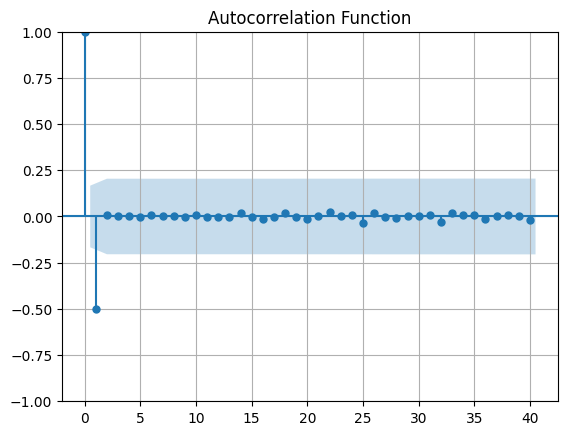

<Figure size 1200x600 with 0 Axes>

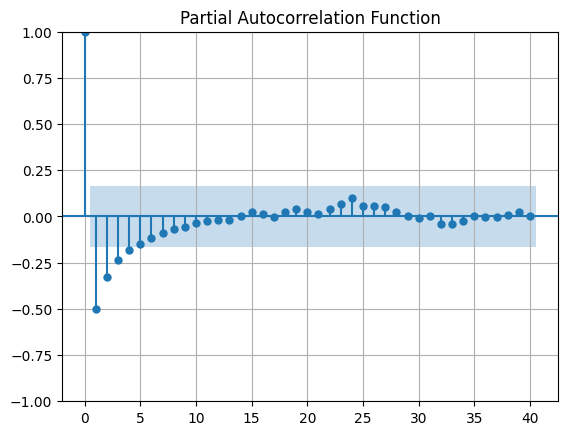

/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_594087/3780916197.py:69: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')


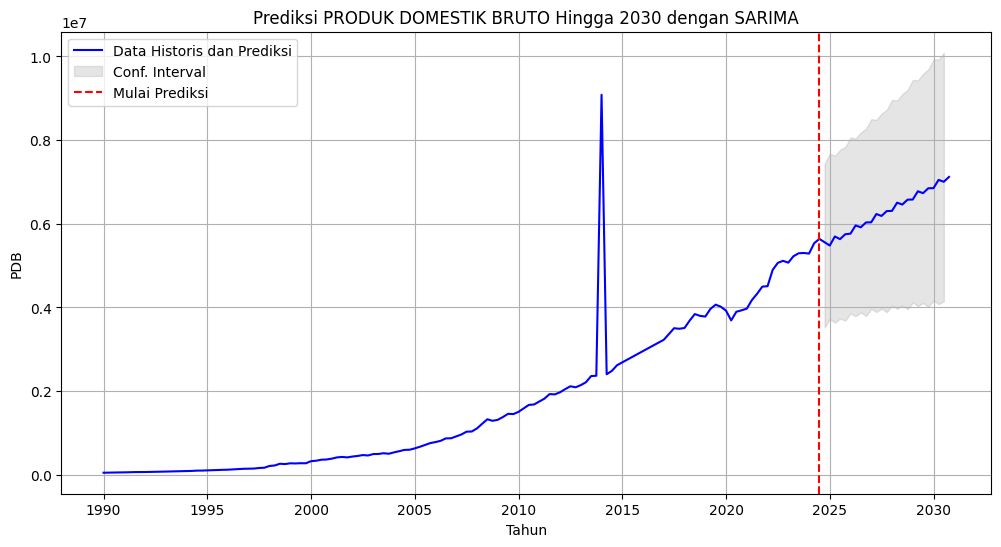

            PRODUK DOMESTIK BRUTO
2024-12-31           5.481074e+06
2025-03-31           5.697059e+06
2025-06-30           5.633489e+06
2025-09-30           5.750801e+06
2025-12-31           5.764547e+06
2026-03-31           5.960813e+06
2026-06-30           5.916269e+06
2026-09-30           6.032672e+06
2026-12-31           6.036058e+06
2027-03-31           6.233515e+06
2027-06-30           6.187821e+06
2027-09-30           6.304279e+06
2027-12-31           6.308291e+06
2028-03-31           6.505676e+06
2028-06-30           6.460052e+06
2028-09-30           6.576507e+06
2028-12-31           6.580481e+06
2029-03-31           6.777870e+06
2029-06-30           6.732242e+06
2029-09-30           6.848697e+06
2029-12-31           6.852673e+06
2030-03-31           7.050062e+06
2030-06-30           7.004434e+06
2030-09-30           7.120889e+06


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')

# Convert Quarter column to datetime and set as index
df['Quarter'] = pd.to_datetime(df['Quarter'], errors='coerce')
df = df.set_index('Quarter')

# Handle missing values using linear interpolation
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')

# Visualize original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='Data Asli', color='blue')
plt.title('Visualisasi Data PDB')
plt.xlabel('Waktu')
plt.ylabel('PDB (dalam juta)')
plt.legend()
plt.grid()
plt.show()

# Check stationarity with ADF test
def check_stationarity(data):
    data = data.dropna()
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("Data tidak stasioner.")
    else:
        print("Data sudah stasioner.")

check_stationarity(df['PRODUK DOMESTIK BRUTO'])

# Differencing to achieve stationarity
df['PDB_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff()
check_stationarity(df['PDB_DIFF'])

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Autocorrelation Function')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['PDB_DIFF'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.show()

# Fit SARIMA model
model = SARIMAX(df['PRODUK DOMESTIK BRUTO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))  # SARIMA(p, d, q)(P, D, Q, s)
model_fit = model.fit(disp=False)

# Forecast future values
n_future_steps = (2030 - df.index[-1].year) * 4
forecast = model_fit.get_forecast(steps=n_future_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create DataFrame for forecast
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=n_future_steps, freq='Q')
forecast_df = pd.DataFrame({'PRODUK DOMESTIK BRUTO': forecast_values.values}, index=future_dates)

# Combine historical data and forecast
result = pd.concat([df[['PRODUK DOMESTIK BRUTO']], forecast_df])

# Visualize historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['PRODUK DOMESTIK BRUTO'], label='Data Historis dan Prediksi', color='blue')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2, label='Conf. Interval')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Mulai Prediksi')
plt.title('Prediksi PRODUK DOMESTIK BRUTO Hingga 2030 dengan SARIMA')
plt.xlabel('Tahun')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

# Display forecasted values
print(forecast_df)
